In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [136]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

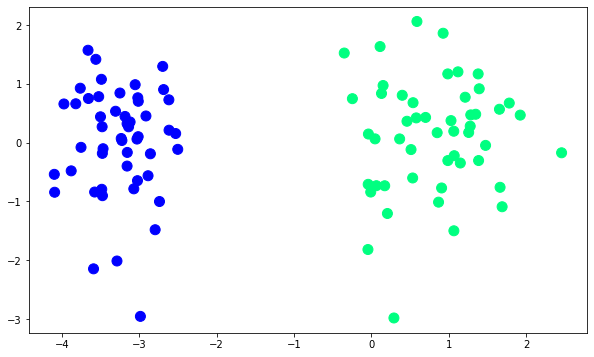

In [137]:
plt.figure(figsize = (10,6))
plt.scatter(X[:,0], X[:,1], c = y, cmap='winter', s = 100)

In [138]:
class Own_logi : 
    def __init__(self, lr = 0.01, epochs = 1000) : 
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = None
        
    def sigmoid(self, z) : 
        return 1 / ( 1 + np.exp(-z) )
    
    def fit(self, X, y) : 
        row, col = X.shape
        self.w = np.ones(col)
        self.b = 0
        
        for epoch in range(self.epochs) : 
            y_cap = self.sigmoid( np.dot(X, self.w) + self.b )
            
            dL_w = (-1/row) * np.dot( y - y_cap, X)
            dL_b = -1 * np.mean( y - y_cap )
            
            self.w = self.w - self.lr * dL_w
            self.b = self.b - self.lr * dL_b
        
    
    def predict(self, X) : 
        return self.sigmoid( np.dot( X, self.w ) + self.b )

In [150]:
own_lr = Own_logi(epochs = 3000, lr = 0.5)

In [151]:
own_lr.fit(X,y)

In [152]:
own_lr.b, own_lr.w

(5.320733694600483, array([4.48311307, 0.18133857]))

In [153]:
from sklearn.linear_model import LogisticRegression

In [154]:
lr = LogisticRegression(penalty = 'none', solver = 'sag')

In [155]:
lr.fit(X, y)

C:\Users\RAKESH\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(penalty='none', solver='sag')

In [156]:
lr.coef_

array([[4.80925064, 0.21481959]])

In [157]:
lr.intercept_

array([5.7770354])

In [158]:
m_own = -(own_lr.w[0]/own_lr.w[1])
b_own = -(own_lr.b/own_lr.w[1])

m_lr = -(lr.coef_[0][0]/lr.coef_[0][1])
b_lr = -(lr.intercept_/lr.coef_[0][1])

In [159]:
x_own = np.linspace(-3,3,100)
y_own = m_own * x_own + b_own

x_lr = np.linspace(-3,3,100)
y_lr = m_lr * x_lr + b_lr

(-3.0, 2.0)

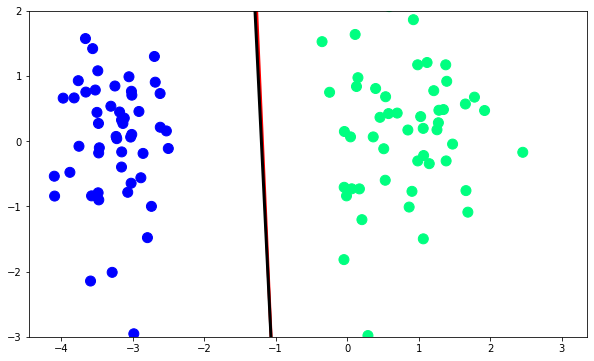

In [160]:
plt.figure(figsize=(10,6))
plt.plot(x_own,y_own,color='red',linewidth=3)
plt.plot(x_lr,y_lr,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)